# Moving horizontal bar race

In [1]:
%matplotlib ipympl

In [73]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd
import matplotlib.animation as animation
import os

In [74]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [75]:
os.getcwd()

'C:\\Users\\ikema\\Onedrive\\Programing\\JupyterlabProjects\\Python\\Data_science\\Example'

## 데이터 쓰다듬기

In [76]:
df = pd.read_csv("data/2020 Best movie data.csv", thousands=',', encoding='utf-8')

In [77]:
df

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,배급사
0,NaN,NaN,NaN,NaN,점유율,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,소울,2021-01-20,7.936307e+09,50.3%,7.936307e+09,874999.0,874999.0,2018.0,63209.0,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,2.0,극장판 귀멸의 칼날: 무한열차편,2021-01-27,1.820103e+09,11.5%,1.820103e+09,206309.0,206309.0,380.0,5816.0,일본,일본,워터홀컴퍼니(주)
3,3.0,원더 우먼 1984,2020-12-23,1.445202e+09,9.2%,4.935633e+09,155562.0,546548.0,1877.0,38241.0,미국,미국,워너브러더스 코리아(주)
4,4.0,화양연화,2000-10-20,4.788446e+08,3.0%,8.788253e+08,52142.0,100156.0,447.0,12472.0,홍콩,"홍콩,프랑스",(주)디스테이션
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,478.0,투캅스,1993-12-18,0.000000e+00,0.0%,2.200000e+05,0.0,41.0,1.0,2.0,한국,한국,NaN
480,478.0,후쿠오카,2020-08-27,0.000000e+00,0.0%,4.403902e+07,0.0,5447.0,1.0,1.0,한국,한국,"(주)률필름,㈜인디스토리"
481,478.0,주유소 습격사건,1999-10-02,0.000000e+00,0.0%,0.000000e+00,0.0,0.0,1.0,1.0,한국,한국,(주)시네마서비스
482,478.0,야구소녀,2020-06-18,0.000000e+00,0.0%,3.193607e+08,0.0,37409.0,1.0,1.0,한국,한국,"(주)싸이더스,찬란"


# 임시(데이터 프레임 다시 생성)

In [78]:
d = {'col1': [1], 'col2': [2]}
renew_df = pd.DataFrame(columns=df['영화명'].head(10))
renew_df

영화명,NaN,소울,극장판 귀멸의 칼날: 무한열차편,원더 우먼 1984,화양연화,세자매,명탐정 코난: 진홍의 수학여행,조제,아이 엠 우먼,도굴


In [79]:
df['영화명']

0                    NaN
1                     소울
2      극장판 귀멸의 칼날: 무한열차편
3             원더 우먼 1984
4                   화양연화
             ...        
479                  투캅스
480                 후쿠오카
481             주유소 습격사건
482                 야구소녀
483                 여고괴담
Name: 영화명, Length: 484, dtype: object

# 필요 없는 데이터 삭제

In [80]:
df = df.drop([0])

In [81]:
df

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,배급사
1,1.0,소울,2021-01-20,7.936307e+09,50.3%,7.936307e+09,874999.0,874999.0,2018.0,63209.0,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,2.0,극장판 귀멸의 칼날: 무한열차편,2021-01-27,1.820103e+09,11.5%,1.820103e+09,206309.0,206309.0,380.0,5816.0,일본,일본,워터홀컴퍼니(주)
3,3.0,원더 우먼 1984,2020-12-23,1.445202e+09,9.2%,4.935633e+09,155562.0,546548.0,1877.0,38241.0,미국,미국,워너브러더스 코리아(주)
4,4.0,화양연화,2000-10-20,4.788446e+08,3.0%,8.788253e+08,52142.0,100156.0,447.0,12472.0,홍콩,"홍콩,프랑스",(주)디스테이션
5,5.0,세자매,2021-01-27,3.544512e+08,2.2%,3.545682e+08,42290.0,42301.0,569.0,5876.0,한국,한국,(주)리틀빅픽쳐스
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,478.0,투캅스,1993-12-18,0.000000e+00,0.0%,2.200000e+05,0.0,41.0,1.0,2.0,한국,한국,NaN
480,478.0,후쿠오카,2020-08-27,0.000000e+00,0.0%,4.403902e+07,0.0,5447.0,1.0,1.0,한국,한국,"(주)률필름,㈜인디스토리"
481,478.0,주유소 습격사건,1999-10-02,0.000000e+00,0.0%,0.000000e+00,0.0,0.0,1.0,1.0,한국,한국,(주)시네마서비스
482,478.0,야구소녀,2020-06-18,0.000000e+00,0.0%,3.193607e+08,0.0,37409.0,1.0,1.0,한국,한국,"(주)싸이더스,찬란"


### Object로 되어있는 날짜 Datetime으로 고치기

In [82]:
df['개봉일'] = pd.to_datetime(df['개봉일'], format='%Y-%m-%d', errors='raise')

In [83]:
df = df.drop(['국적 ', '배급사 ', '대표국적 '], axis=1)

In [84]:
df['개봉일']

1     2021-01-20
2     2021-01-27
3     2020-12-23
4     2000-10-20
5     2021-01-27
         ...    
479   1993-12-18
480   2020-08-27
481   1999-10-02
482   2020-06-18
483   1998-05-30
Name: 개봉일, Length: 483, dtype: datetime64[ns]

### 마스킹을 통해 비교 연산자를 이용한 True값만 남기기

In [85]:
mask = (df['개봉일'] > '2021-01-01') & (df['관객수 '] > 10000)

In [86]:
df_new = df.loc[mask]

In [87]:
df_filtered = df_new[['순위', '영화명', '개봉일', '관객수 ']]

In [88]:
df_filtered

,순위,영화명,개봉일,관객수
1,1.0,소울,2021-01-20,874999.0
2,2.0,극장판 귀멸의 칼날: 무한열차편,2021-01-27,206309.0
5,5.0,세자매,2021-01-27,42290.0
6,6.0,명탐정 코난: 진홍의 수학여행,2021-01-27,38131.0
8,8.0,아이 엠 우먼,2021-01-14,21913.0
11,11.0,블라인드,2021-01-14,18297.0
12,12.0,#아이엠히어,2021-01-14,16290.0
13,13.0,빅풋 주니어2: 패밀리가 떴다,2021-01-06,14682.0
14,14.0,커넥트,2021-01-20,14140.0
16,16.0,미스터 존스,2021-01-07,10727.0


In [89]:
# 순위 다시 매기기

ranked_df = df_filtered['관객수 '].rank(ascending=False)

In [90]:
ranked_df

1      1.0
2      2.0
5      3.0
6      4.0
8      5.0
11     6.0
12     7.0
13     8.0
14     9.0
16    10.0
Name: 관객수 , dtype: float64

In [91]:
df_filtered.replace(df_filtered['순위'], ranked_df)

,순위,영화명,개봉일,관객수
1,1.0,소울,2021-01-20,874999.0
2,2.0,극장판 귀멸의 칼날: 무한열차편,2021-01-27,206309.0
5,5.0,세자매,2021-01-27,42290.0
6,6.0,명탐정 코난: 진홍의 수학여행,2021-01-27,38131.0
8,8.0,아이 엠 우먼,2021-01-14,21913.0
11,11.0,블라인드,2021-01-14,18297.0
12,12.0,#아이엠히어,2021-01-14,16290.0
13,13.0,빅풋 주니어2: 패밀리가 떴다,2021-01-06,14682.0
14,14.0,커넥트,2021-01-20,14140.0
16,16.0,미스터 존스,2021-01-07,10727.0


In [92]:
df_filtered

,순위,영화명,개봉일,관객수
1,1.0,소울,2021-01-20,874999.0
2,2.0,극장판 귀멸의 칼날: 무한열차편,2021-01-27,206309.0
5,5.0,세자매,2021-01-27,42290.0
6,6.0,명탐정 코난: 진홍의 수학여행,2021-01-27,38131.0
8,8.0,아이 엠 우먼,2021-01-14,21913.0
11,11.0,블라인드,2021-01-14,18297.0
12,12.0,#아이엠히어,2021-01-14,16290.0
13,13.0,빅풋 주니어2: 패밀리가 떴다,2021-01-06,14682.0
14,14.0,커넥트,2021-01-20,14140.0
16,16.0,미스터 존스,2021-01-07,10727.0


> 2021-01-04

- 데이터 피봇해서 의도했던 데이터를 만들어야 한다

# pivot

In [93]:
date_index = pd.Series(pd.date_range("2020", freq="D", periods=31))
date_index

0    2020-01-01
1    2020-01-02
2    2020-01-03
3    2020-01-04
4    2020-01-05
5    2020-01-06
6    2020-01-07
7    2020-01-08
8    2020-01-09
9    2020-01-10
10   2020-01-11
11   2020-01-12
12   2020-01-13
13   2020-01-14
14   2020-01-15
15   2020-01-16
16   2020-01-17
17   2020-01-18
18   2020-01-19
19   2020-01-20
20   2020-01-21
21   2020-01-22
22   2020-01-23
23   2020-01-24
24   2020-01-25
25   2020-01-26
26   2020-01-27
27   2020-01-28
28   2020-01-29
29   2020-01-30
30   2020-01-31
dtype: datetime64[ns]

In [94]:
length = df_filtered.shape[0]
height = df_filtered.shape[1]

In [95]:
new_df = df_filtered.pivot(columns='영화명', values='관객수 ')
new_df

영화명,#아이엠히어,극장판 귀멸의 칼날: 무한열차편,명탐정 코난: 진홍의 수학여행,미스터 존스,블라인드,빅풋 주니어2: 패밀리가 떴다,세자매,소울,아이 엠 우먼,커넥트
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,874999.0,NaN,NaN
2,NaN,206309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,42290.0,NaN,NaN,NaN
6,NaN,NaN,38131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21913.0,NaN
11,NaN,NaN,NaN,NaN,18297.0,NaN,NaN,NaN,NaN,NaN
12,16290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,14682.0,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14140.0
16,NaN,NaN,NaN,10727.0,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# 날짜대로 늘리기

new_df = new_df.reindex(range(31))
new_df

영화명,#아이엠히어,극장판 귀멸의 칼날: 무한열차편,명탐정 코난: 진홍의 수학여행,미스터 존스,블라인드,빅풋 주니어2: 패밀리가 떴다,세자매,소울,아이 엠 우먼,커넥트
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,874999.0,NaN,NaN
2,NaN,206309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,42290.0,NaN,NaN,NaN
6,NaN,NaN,38131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21913.0,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
def ReplaceValue(data, time, frames) :
    column_value_list = list(data.columns.values)
    
    # 마지막줄 Replace
    for c_value in column_value_list :
        last_valid_index = data[c_value].last_valid_index() 
        last_valid_value = data[c_value][last_valid_index]
        last_index = time * frames - 1
        
        #replace 
        data.loc[last_index, c_value] = data.loc[last_valid_index, c_value]
    
    # np.nan 모두 제거
    data = data.dropna()
    
    # 데이터프레임을 내가 원하는 만큼 늘리기
    data = data.reindex(range(time * frames))
    
    # 첫번째 줄 모두 0 으로 만들기
    data.loc[0] = 0
    
    # 보간
    data = data.interpolate()
    
    return data
    

In [98]:
test_df = ReplaceValue(new_df, 10, frames=60)

> 오늘은 여기까지
데이터가 비어있는지 확인해서 아래로 보내는 작업중

# plot 하기

In [99]:
test_df

영화명,#아이엠히어,극장판 귀멸의 칼날: 무한열차편,명탐정 코난: 진홍의 수학여행,미스터 존스,블라인드,빅풋 주니어2: 패밀리가 떴다,세자매,소울,아이 엠 우먼,커넥트
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,27.195326,344.422371,63.657763,17.908180,30.545910,24.510851,70.601002,1460.766277,36.582638,23.60601
2,54.390651,688.844741,127.315526,35.816361,61.091820,49.021703,141.202003,2921.532554,73.165275,47.21202
3,81.585977,1033.267112,190.973289,53.724541,91.637730,73.532554,211.803005,4382.298831,109.747913,70.81803
4,108.781302,1377.689482,254.631052,71.632721,122.183639,98.043406,282.404007,5843.065109,146.330551,94.42404
...,...,...,...,...,...,...,...,...,...,...
595,16181.218698,204931.310518,37876.368948,10655.367279,18174.816361,14583.956594,42007.595993,869155.934891,21766.669449,14045.57596
596,16208.414023,205275.732888,37940.026711,10673.275459,18205.362270,14608.467446,42078.196995,870616.701169,21803.252087,14069.18197
597,16235.609349,205620.155259,38003.684474,10691.183639,18235.908180,14632.978297,42148.797997,872077.467446,21839.834725,14092.78798
598,16262.804674,205964.577629,38067.342237,10709.091820,18266.454090,14657.489149,42219.398998,873538.233723,21876.417362,14116.39399


In [100]:
barh_name = test_df.columns.values
barh_value = test_df.iloc[299]

In [101]:
len(barh_name)

10

In [102]:
colors = plt.cm.Dark2(range(len(barh_name)))

In [103]:
data_value

16290.0

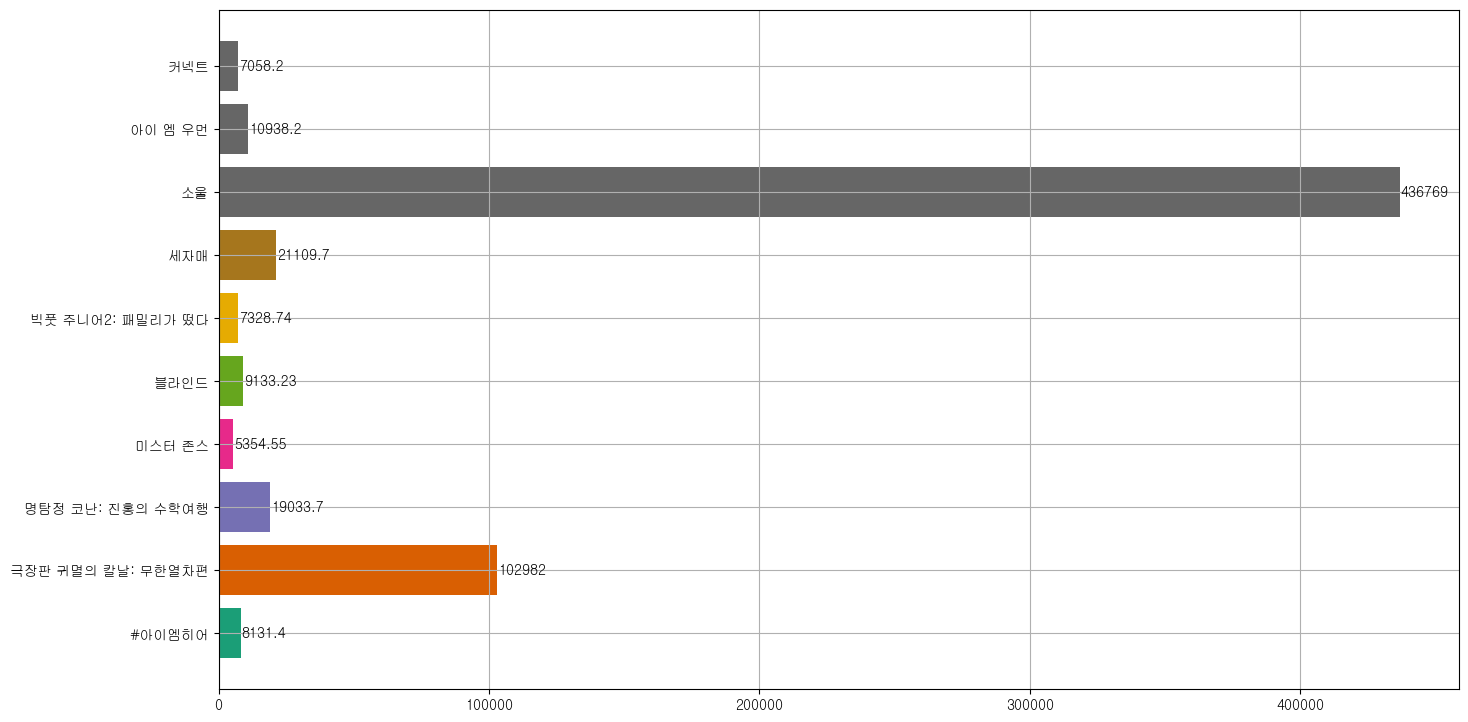

In [118]:
data_value = test_df.iloc[299][0]

fig, ax = plt.subplots(figsize=(16,9), dpi=100)

bar_test = ax.barh(barh_name, barh_value, color=colors, align='center')
ax.bar_label(bar_test, padding=0.8)
ax.grid(visible=True)


In [ ]:
# Making 

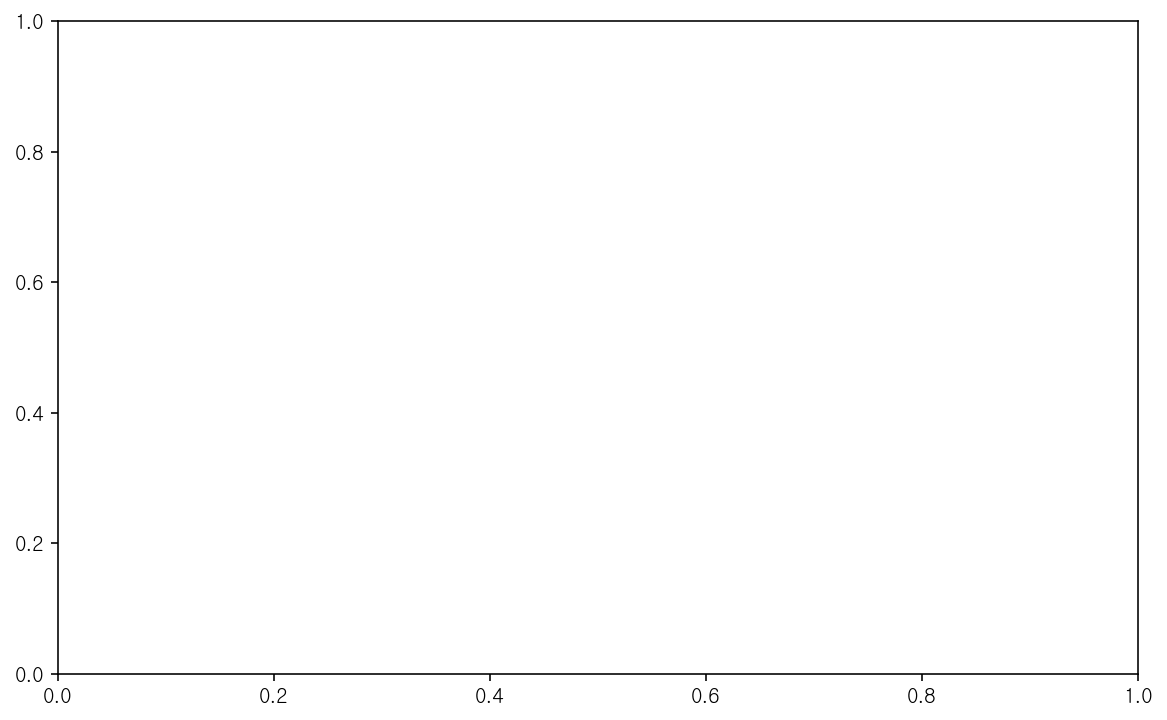

In [116]:
fig = plt.figure(figsize=(10,6), dpi=144)
ax = fig.add_subplot()
plt.subplots_adjust(left=0.2, right=0.95)


def init() :
    ax.clear()
    
def update(i) :
    ax.cla() # ax에 모든것을 지운다.
    ax.set_xlim(0, 1000000)    
    width = test_df.iloc[i] # row i의 줄을 width로 쓰기 - 10개 나온다
    
    hbars = ax.barh(barh_name, width=width, color=colors) 
    
    # 지운 뒤 라벨을 계속해서 다시 생성한다.
    ax.bar_label(hbars, padding=1)

anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(test_df), interval=1000, repeat=False)


In [117]:
writermp4 = animation.FFMpegWriter(fps=60) #write를 어떤 코덱을 사용할 것인가. (ex)FFMpegWriter(fps=24)
anim.save('movie\Bestmoviechart.mp4', writer=writermp4, dpi=144) #저장 

In [34]:
test_df.iloc[2]

영화명
#아이엠히어                108.963211
극장판 귀멸의 칼날: 무한열차편    1379.993311
명탐정 코난: 진홍의 수학여행      255.056856
미스터 존스                 71.752508
블라인드                  122.387960
빅풋 주니어2: 패밀리가 떴다       98.207358
세자매                   282.876254
소울                   5852.836120
아이 엠 우먼               146.575251
커넥트                    94.581940
Name: 2, dtype: float64